# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Define the base URL for the OpenWeatherMap.org website
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Initialize several lists
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the log
print (f'-------------------------------\nBegin the data retrival\n-------------------------------')

# For each city in our list
for i, city in enumerate(cities):
    
    # Update the user
    print (f'Getting data for city #{i}, {city}...')

    # Build the URL and get the JSON response
    query_url = base_url + "appid=" + api_key + "&q=" + city + "&units=Imperial"
    weather_json = requests.get(query_url).json()
    
    if (weather_json["cod"]=="404"):
        
        # The dreded 404!
        print (f'No data found for {city}')
        cloudiness.append(np.nan)
        country.append(np.nan)
        humidity.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        wind_speed.append(np.nan)
    else:
        
        # Store the data of interest
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
            
# Close the log
print (f'------------------------------- \nEnd the data retrival\n-------------------------------')


-------------------------------
Begin the data retrival
-------------------------------
Getting data for city #0, kamaishi...
Getting data for city #1, mataura...
Getting data for city #2, vila...
Getting data for city #3, hobart...
Getting data for city #4, ushuaia...
Getting data for city #5, bredasdorp...
Getting data for city #6, arnold...
Getting data for city #7, plainview...
Getting data for city #8, georgetown...
Getting data for city #9, hithadhoo...
Getting data for city #10, cabedelo...
Getting data for city #11, tolcsva...
Getting data for city #12, rikitea...
Getting data for city #13, sabratah...
Getting data for city #14, illoqqortoormiut...
No data found for illoqqortoormiut
Getting data for city #15, monrovia...
Getting data for city #16, faya...
Getting data for city #17, bilisht...
Getting data for city #18, lebu...
Getting data for city #19, eskasem...
No data found for eskasem
Getting data for city #20, saint-pierre...
Getting data for city #21, caravelas...
Gettin

Getting data for city #186, gorno-chuyskiy...
No data found for gorno-chuyskiy
Getting data for city #187, stephenville...
Getting data for city #188, souillac...
Getting data for city #189, ostrovnoy...
Getting data for city #190, dillon...
Getting data for city #191, esperance...
Getting data for city #192, zaranj...
Getting data for city #193, ketchikan...
Getting data for city #194, norman wells...
Getting data for city #195, koshurnikovo...
Getting data for city #196, sinnamary...
Getting data for city #197, vestmannaeyjar...
Getting data for city #198, zwedru...
Getting data for city #199, ghorawal...
Getting data for city #200, palabuhanratu...
No data found for palabuhanratu
Getting data for city #201, severo-kurilsk...
Getting data for city #202, narsaq...
Getting data for city #203, muros...
Getting data for city #204, marawi...
Getting data for city #205, renqiu...
Getting data for city #206, cabo san lucas...
Getting data for city #207, nyaunglebin...
Getting data for city 

Getting data for city #373, camapua...
Getting data for city #374, umm kaddadah...
Getting data for city #375, yar-sale...
Getting data for city #376, margate...
Getting data for city #377, gamba...
Getting data for city #378, purwodadi...
Getting data for city #379, sistranda...
Getting data for city #380, cockburn town...
Getting data for city #381, talnakh...
Getting data for city #382, touros...
Getting data for city #383, chernyshevsk...
Getting data for city #384, arlit...
Getting data for city #385, raditsa-krylovka...
Getting data for city #386, fairbanks...
Getting data for city #387, atar...
Getting data for city #388, aswan...
Getting data for city #389, beyneu...
Getting data for city #390, muzaffargarh...
Getting data for city #391, senneterre...
Getting data for city #392, brainerd...
Getting data for city #393, yakeshi...
Getting data for city #394, aklavik...
Getting data for city #395, mandera...
Getting data for city #396, kailaras...
Getting data for city #397, spenc

Getting data for city #568, mayumba...
Getting data for city #569, gazanjyk...
Getting data for city #570, rungata...
No data found for rungata
Getting data for city #571, lazarev...
Getting data for city #572, narrabri...
Getting data for city #573, lusambo...
Getting data for city #574, alghero...
Getting data for city #575, axim...
Getting data for city #576, taraclia...
Getting data for city #577, marystown...
Getting data for city #578, olafsvik...
No data found for olafsvik
Getting data for city #579, gizo...
Getting data for city #580, honiara...
Getting data for city #581, turi...
Getting data for city #582, roma...
Getting data for city #583, puerto montt...
Getting data for city #584, yulara...
Getting data for city #585, sovetskiy...
Getting data for city #586, tessalit...
Getting data for city #587, port hardy...
Getting data for city #588, kerrobert...
Getting data for city #589, ndago...
Getting data for city #590, yeniseysk...
Getting data for city #591, mareeba...
Getti

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Build a dataframe
raw_weather_df = pd.DataFrame ({"cities":cities, 
                            "cloudiness":cloudiness, 
                            "country":country, 
                            "humidity":humidity, 
                            "lat":lat, 
                            "lng":lng, 
                            "temp":max_temp, 
                            "wind":wind_speed})

# Clean the data by dropping any row with an "nan" in any column
weather_df = raw_weather_df.dropna()
weather_df.reset_index(inplace=True, drop=True)

# Save the data to a CSV file
weather_df.to_csv (output_data_file)

# Display the DataFrame
print (f"The number of rows in the dataframe is {len(weather_df.index)}")
weather_df.head()


The number of rows in the dataframe is 543


,cities,cloudiness,country,humidity,lat,lng,temp,wind
0,kamaishi,40.0,JP,57.0,39.28,141.86,80.60,5.82
1,mataura,46.0,NZ,81.0,-46.19,168.86,51.01,5.99
2,vila,40.0,IT,83.0,45.18,8.40,80.01,6.93
3,hobart,0.0,AU,50.0,-42.88,147.33,57.20,8.05
4,ushuaia,75.0,AR,92.0,-54.81,-68.31,30.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

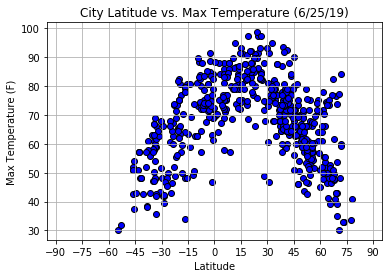

In [14]:
# Create the scatter plot
plt.scatter(weather_df["lat"], weather_df["temp"], marker="o", facecolors="blue", edgecolors="black")

# Add title & labels, other formatting
plt.title("City Latitude vs. Max Temperature (6/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-95,95)
plt.xticks(np.arange(-90, 100, 15))
plt.grid()

# Save and display
plt.savefig("output_data/Latitude vs Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

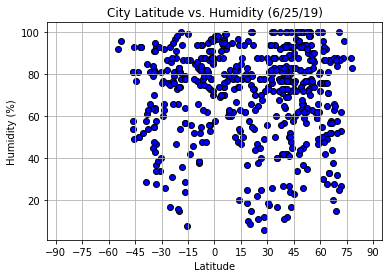

In [15]:
# Create the scatter plot
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o", facecolors="blue", edgecolors="black")

# Add title & labels, other formatting
plt.title("City Latitude vs. Humidity (6/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-95,95)
plt.xticks(np.arange(-90, 100, 15))
plt.grid()

# Save and display
plt.savefig("output_data/Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

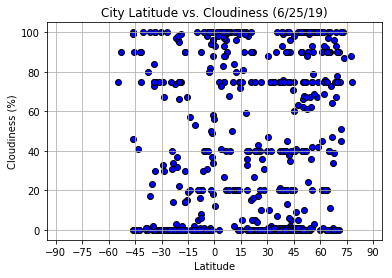

In [16]:
# Create the scatter plot
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Add title & labels, other formatting
plt.title("City Latitude vs. Cloudiness (6/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-95,95)
plt.xticks(np.arange(-90, 100, 15))
plt.grid()

# Save and display
plt.savefig("output_data/Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

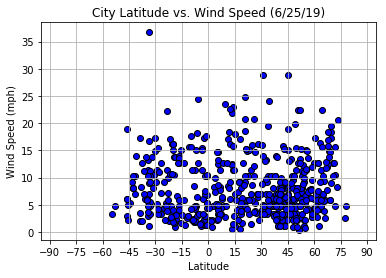

In [17]:
# Create the scatter plot
plt.scatter(weather_df["lat"], weather_df["wind"], marker="o", facecolors="blue", edgecolors="black")

# Add title & labels, other formatting
plt.title("City Latitude vs. Wind Speed (6/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-95,95)
plt.xticks(np.arange(-90, 100, 15))
plt.grid()

# Save and display
plt.savefig("output_data/Latitude vs Wind Speed.png")
plt.show()

## Conclusions

1) From the first graph, there is a definite pattern of high temperatures near the equator (latitude=0), and lower temperatures near the south and north poles (-90 latitude and +90 latitude respectively).  However, the warmest temperatures appear in the range of +15 to +30 latitude, at least in late June.  This is consistent with the angle of the earth relative to the sun at the summer solstice, as the Tropic of Cancer, which marks the latitude at which the sun is directly overhead at the summer soltice, is at 23°26ʹ latitude.

2) There are more cities in the northern hemisphere (more dots to the right of the 0 latitude line) than in the southern hemisphere.

3) More cities have humidity above 60% than below it.  Also, the measurement of humidity is likely "binned" by the data gathering organization, as there appears to be concentrations of humidity readings at 90% and 80%, whereas I would expect it to be more of a continuous measurement between 0% and 100%.  Low humitidy (below 40%) is rare around the equator.

4) "Cloudiness" is likely a somewhat arbitrary number, as there are major "bins" in the data, with many dots in a horizontal lines other than 0% (perfectly clear skis) and 100% (totally cloudy). I would expect it to be a continuous measurement betweeen 0% and 100%.  This data is not particularly useful given the "binning".

5) Wind speed looks to be largely a random variable, with perhaps some increase in wind speed for those cities at +70 to +75 latitude.  Perhaps those cities are concentrated on the ocean edges, as those northern latitudes likely have frozen land far from the oceans, making them rather uninhabitable.  Thus, those cities at higher latitudes are near the ocean which is naturally more windy.